# BMR vs Bathymetry Scatterplot, Characteristed by Ice Draft Depth and Proximity to Grounding Line

Data Sources:   
BMR:  
 - Richter, O., Gwyther, D. E., Galton-Fenzi, B. K., and Naughten, K. A.: The Whole Antarctic Ocean Model (WAOM v1.0): development and evaluation, Geosci. Model Dev., 15, 617–647, https://doi.org/10.5194/gmd-15-617-2022, 2022.


Note: geotiffs have origin 0,0 and a resolution of 2 KM. The 'proximity' geotiff was calculated using the 'Proximity Raster Distance' tool in QGIS

In [6]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from matplotlib.font_manager import FontProperties

In [25]:
# Prepping the data:
with rasterio.open("WAOM_2011_BMR.tif") as src1, \
     rasterio.open("WAOM_2011_h_bathymetry.tif") as src2, \
     rasterio.open("WAOM_2011_zice_ice_draft.tif") as src3, \
     rasterio.open("WAOM_2011_proximity_map_to_grounding_line.tif") as src4: 

    z1 = src1.read(1)  # BMR
    z2 = src2.read(1)  # Bathymetry
    z3 = src3.read(1)  # Ice draft
    z4 = src4.read(1)  # Distance to grounding line

    nodata1, nodata2, nodata3, nodata4 = src1.nodata, src2.nodata, src3.nodata, src4.nodata

mask = (~np.isnan(z1)) & (~np.isnan(z2)) & (~np.isnan(z3)) & (~np.isnan(z4))
if nodata1 is not None: mask &= (z1 != nodata1)
if nodata2 is not None: mask &= (z2 != nodata2)
if nodata3 is not None: mask &= (z3 != nodata3)
if nodata4 is not None: mask &= (z4 != nodata4)
mask &= (z1 != 0)

z1_valid = z1[mask].flatten() * (365 * 24 * 60 * 60)  # this converts BMR from m/s to to m/yr
z2_valid = z2[mask].flatten()  
z3_valid = np.abs(z3[mask].flatten())  # this takes the absolute value for ice draft depth (metres below surface)
z4_valid = z4[mask].flatten()  

# remember: each pixel is 2 km
bins = [0, 1, 5, 15, np.inf]
bin_labels = ["<2 KMs", "2-10 KMs", "10-30 KMs", ">30 KMs"]
sizes = [200, 100, 50, 10] 
bin_indices = np.digitize(z4_valid, bins) - 1
point_sizes = np.array([sizes[i] for i in bin_indices])  

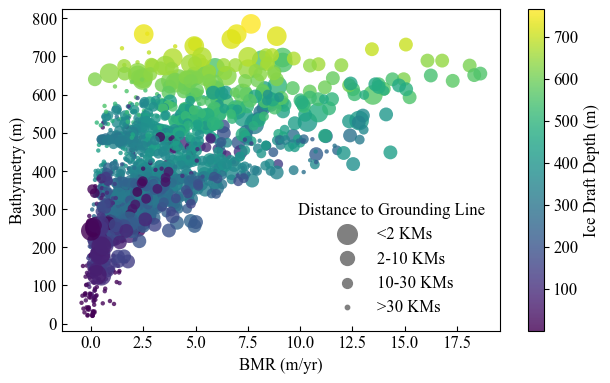

In [29]:
# Plotting the data:
plt.figure(figsize=(160/25.4, 100/25.4)) # mm to inches

sc = plt.scatter(z1_valid, z2_valid, c=z3_valid, cmap='viridis', s=point_sizes, alpha=0.8, edgecolor='none')

plt.xlabel("BMR (m/yr)", fontsize=12, fontfamily='Times New Roman')
plt.ylabel("Bathymetry (m)", fontsize=12, fontfamily='Times New Roman')
plt.tick_params(direction='in')
plt.xticks(fontsize=12, fontfamily='Times New Roman')
plt.yticks(fontsize=12, fontfamily='Times New Roman')

cbar = plt.colorbar(sc)
cbar.set_label("Ice Draft Depth (m)", fontsize=12, fontfamily='Times New Roman')
cbar.ax.tick_params(labelsize=12)
for tick in cbar.ax.get_yticklabels():
    tick.set_fontfamily('Times New Roman')

# ensures that the legend box are gray shapes
legend_handles = [
    plt.scatter([], [], s=sizes[i], color='gray', label=bin_labels[i])
    for i in range(len(bin_labels))
]
legend_font = FontProperties(family='Times New Roman', size=12)
legend_title_font = FontProperties(family='Times New Roman', size=12)
legend =plt.legend(handles=legend_handles, title="Distance to Grounding Line", loc='lower right', prop=legend_font, title_fontproperties=legend_title_font)
legend.get_frame().set_linewidth(0)

plt.tight_layout()
#plt.savefig('BMR_Bathymetry_Scatterplot.jpg', dpi=500, bbox_inches='tight')
plt.show()